# Initial EDA
### Case Study 5, DAEN 400
October 31st, 2025

In [30]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Zillow data set

In [2]:
zillow_df = pd.read_csv('Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

In [3]:
zillow_df = zillow_df[zillow_df['RegionName'] == 76065]

In [4]:
# Suppose your DataFrame is called zillow_df
# Identify the non-date columns (you said there are 9 of them)
non_date_cols = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 
                 'StateName', 'State', 'City', 'Metro', 'CountyName']

# Melt (unpivot) the DataFrame
zillow_df = zillow_df.melt(
    id_vars=non_date_cols,
    var_name='Date',
    value_name='ZHVI'
)

# Convert the Date column to datetime if needed
zillow_df['Date'] = pd.to_datetime(zillow_df['Date'], errors='coerce')

# Drop rows with NaN in Date (if there were any non-date columns that slipped in)
zillow_df = zillow_df.dropna(subset=['Date', 'ZHVI']).reset_index(drop=True)


In [5]:
zillow_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Date,ZHVI
0,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2009-01-31,188438.751221
1,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2009-02-28,188099.168468
2,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2009-03-31,187923.385526
3,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2009-04-30,187400.473974
4,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2009-05-31,186960.172194
...,...,...,...,...,...,...,...,...,...,...,...
196,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2025-05-31,453405.242441
197,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2025-06-30,452048.962695
198,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2025-07-31,450995.150491
199,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2025-08-31,450762.653868


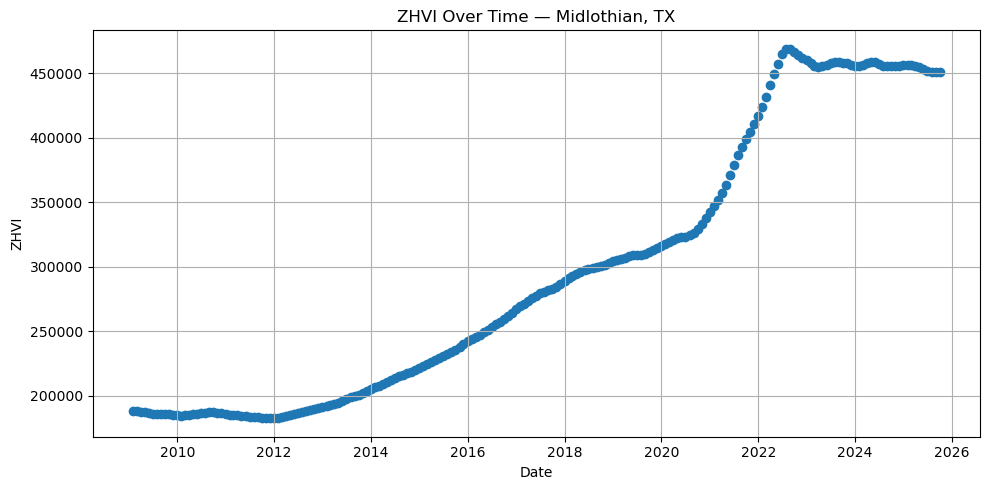

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(zillow_df['Date'], zillow_df['ZHVI'], marker='o')
plt.title(f"ZHVI Over Time — Midlothian, TX")
plt.xlabel("Date")
plt.ylabel("ZHVI")
plt.grid(True)
plt.tight_layout()
plt.show()


# Realtor.com data set

In [24]:
realtor_df = pd.read_csv('RDC_Inventory_Hotness_Metrics_Zip_History.csv')

In [34]:
realtor_df = realtor_df[realtor_df['postal_code'] == 76065]

def parse_date(row):
    year = str(row['month_date_yyyymm'])[0:4]
    month = str(row['month_date_yyyymm'])[4:]
    day = '01' # Default to first day of month

    date = '-'.join([year, month, day])
    
    return date

realtor_df['Date'] = realtor_df.apply(parse_date, axis=1)

# Type cast date
realtor_df['Date'] = pd.to_datetime(realtor_df['Date'])

# Sort chronilogicaly 
realtor_df = realtor_df.sort_values(by='Date')

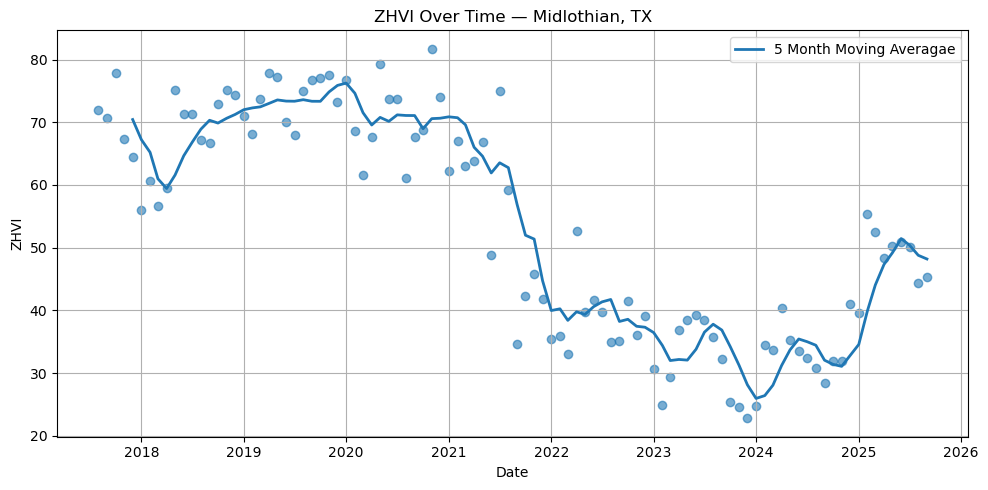

In [37]:
plt.figure(figsize=(10, 5))
plt.scatter(realtor_df['Date'], realtor_df['hotness_score'], marker='o', alpha=0.6)

# 60 day moving average (you pick the window depending on granularity of dataset)
realtor_df['MA'] = realtor_df['hotness_score'].rolling(window=5).mean()

plt.plot(realtor_df['Date'], realtor_df['MA'], linewidth=2, label='5 Month Moving Averagae')

plt.title("ZHVI Over Time — Midlothian, TX")
plt.xlabel("Date")
plt.ylabel("ZHVI")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
pricing_df = pd.read_csv('RDC_Inventory_Core_Metrics_Zip_History.csv')

In [41]:
pricing_df = test


In [42]:
pricing_df = pricing_df[pricing_df['postal_code'] == 76065]

def parse_date(row):
    year = str(row['month_date_yyyymm'])[0:4]
    month = str(row['month_date_yyyymm'])[4:]
    day = '01' # Default to first day of month

    date = '-'.join([year, month, day])
    
    return date

pricing_df['Date'] = pricing_df.apply(parse_date, axis=1)

# Type cast date
pricing_df['Date'] = pd.to_datetime(pricing_df['Date'])

# Sort chronilogicaly 
pricing_df = pricing_df.sort_values(by='Date')

/var/folders/4l/7v6hcr694g9cfcy972vh294m0000gn/T/ipykernel_66171/566980194.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pricing_df['Date'] = pricing_df.apply(parse_date, axis=1)
/var/folders/4l/7v6hcr694g9cfcy972vh294m0000gn/T/ipykernel_66171/566980194.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pricing_df['Date'] = pd.to_datetime(pricing_df['Date'])


In [ ]:
# Merge the two
merged_df = pd.merge(pricing_df, realtor_df, on='Date', how='inner')


,month_date_yyyymm,postal_code,zip_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag,Date
3168068,201607,76065,"midlothian, tx",330133.0,NaN,NaN,146.0,NaN,NaN,61.0,...,NaN,NaN,262.0,NaN,NaN,0.7945,NaN,NaN,NaN,2016-07-01
3128462,201608,76065,"midlothian, tx",330440.0,NaN,NaN,142.0,NaN,NaN,60.0,...,NaN,NaN,250.0,NaN,NaN,0.7633,NaN,NaN,NaN,2016-08-01
3091077,201609,76065,"midlothian, tx",327018.0,NaN,NaN,150.0,NaN,NaN,57.0,...,NaN,NaN,239.0,NaN,NaN,0.5920,NaN,NaN,NaN,2016-09-01
3076385,201610,76065,"midlothian, tx",342500.0,NaN,NaN,152.0,NaN,NaN,57.0,...,NaN,NaN,237.0,NaN,NaN,0.5461,NaN,NaN,NaN,2016-10-01
3048953,201611,76065,"midlothian, tx",344029.0,NaN,NaN,135.0,NaN,NaN,66.0,...,NaN,NaN,229.0,NaN,NaN,0.6704,NaN,NaN,NaN,2016-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119270,202506,76065,"midlothian, tx",546000.0,0.0113,0.0018,272.0,0.0442,-0.1620,53.0,...,0.0066,0.0299,422.0,0.0420,-0.1190,0.5580,-0.0035,0.0889,0.0,2025-06-01
95025,202507,76065,"midlothian, tx",539475.0,-0.0120,0.0227,277.0,0.0184,-0.1868,59.0,...,0.0024,0.0485,415.0,-0.0166,-0.1478,0.4955,-0.0625,0.0690,0.0,2025-07-01
69594,202508,76065,"midlothian, tx",540000.0,0.0010,0.0286,261.0,-0.0561,-0.2435,67.0,...,0.0030,0.0742,398.0,-0.0410,-0.1878,0.5326,0.0371,0.1065,0.0,2025-08-01
45437,202509,76065,"midlothian, tx",547238.0,0.0134,0.0451,245.0,-0.0632,-0.2407,73.0,...,0.0012,0.0807,378.0,-0.0515,-0.2086,0.5501,0.0175,0.0594,0.0,2025-09-01
